In [23]:
import pickle
import numpy as np
from skimage import io
from skimage.measure import label
from matplotlib import pyplot as plt
from Quality import compute_overlap_array
from skimage.filters import threshold_otsu

In [16]:
def make_overlap_vol(a, b):
    bin_a = np.stack([elem > threshold_otsu(elem) for elem in a])
    bin_b = np.stack([elem > threshold_otsu(elem) for elem in b])
    rgb_both = np.moveaxis(np.stack([bin_a, bin_b, np.zeros_like(bin_a)]), 0, -1)
    rgb_both = rgb_both.astype(float)
    return rgb_both

In [20]:
def summarize(pred, gt):
    overlap = compute_overlap_array(pred, gt)
    
    plt.figure()
    plt.title('Prediction Per Gt')

    ax = plt.subplot(111)
    arr = np.array(overlap['predictionPerGt'])
       
    retrieved = np.sum([arr >= 1])
    relevant= np.sum(np.ones_like(arr))
    rec = retrieved/relevant
    
    freq = [np.sum([arr == 0]),
            np.sum([arr == 1]),
            np.sum([arr >= 2])]

    plt.bar([0, 1, 2], freq)
    ax.set_xticks([0, 1, 2])
    plt.show()
    
    plt.figure()
    plt.title('Gt Per Prediction')

    ax = plt.subplot(111)
    arr = np.array(overlap['gtPerPrediction'])
    
    tp = np.sum([arr >= 1])
    fp = np.sum([arr == 0])
    prec = tp/(fp + tp)
 
    
    freq = [np.sum([arr == 0]),
            np.sum([arr == 1]),
            np.sum([arr >= 2])]

    plt.bar([0, 1, 2], freq)
    ax.set_xticks([0, 1, 2])
    plt.show()
    return prec, rec


In [10]:
cutouts = pickle.load(open('./collman_15_annotation_native_res.pkl', 'rb'))
annotations = label(np.stack(cutouts['annotation']) > 0)
results = np.array(io.imread('./results')).astype(np.uint8)

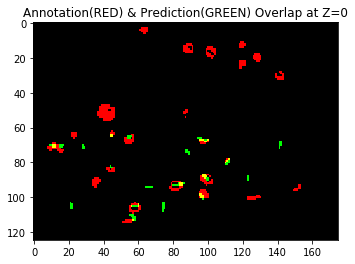

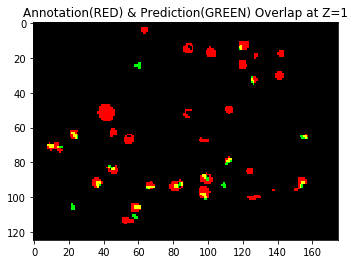

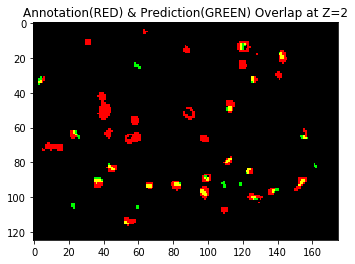

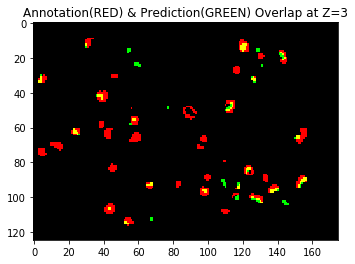

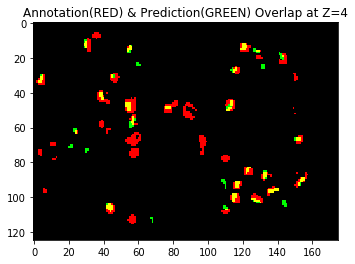

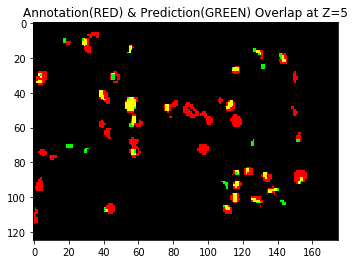

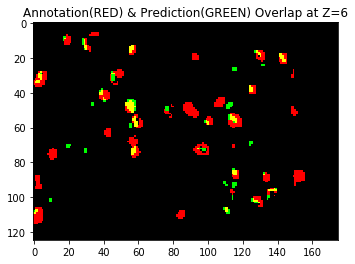

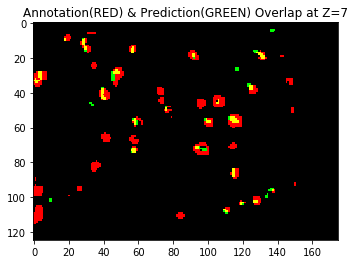

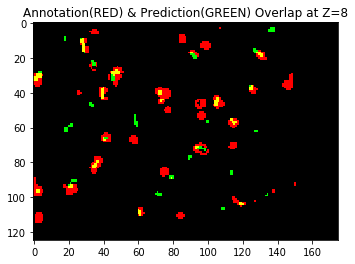

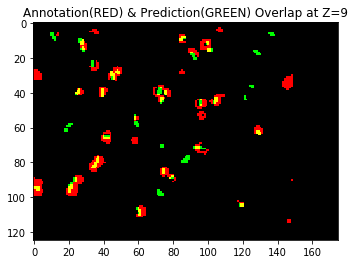

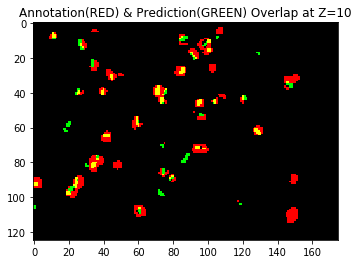

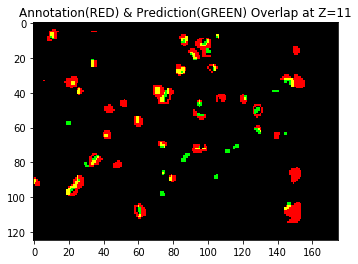

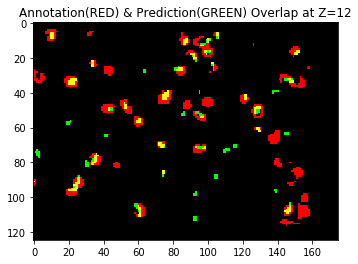

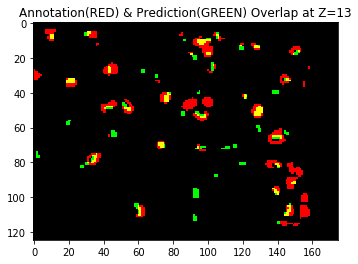

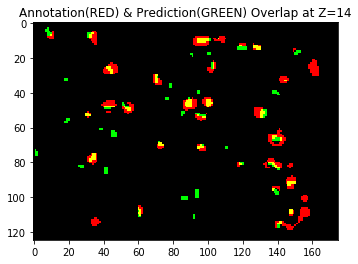

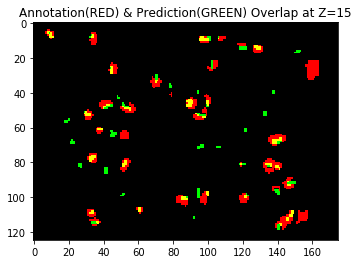

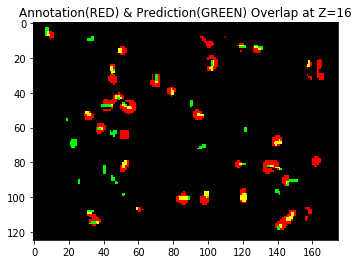

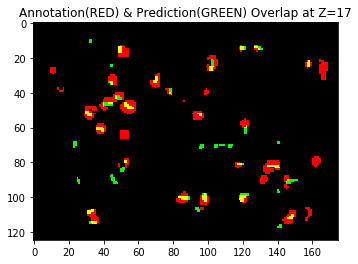

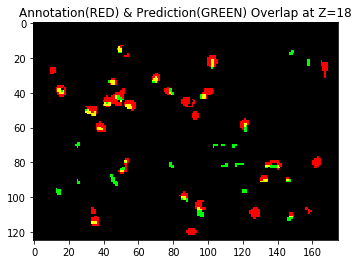

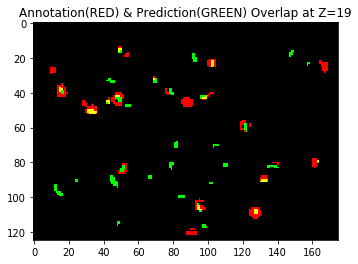

In [19]:
overlap_vol = make_overlap_vol(results, annotations)
for z_index in range(annotations.shape[0]):
    plt.figure()
    plt.title('Annotation(RED) & Prediction(GREEN) Overlap at Z=' + str(z_index))
    plt.imshow(overlap_vol[z_index])
    plt.show()

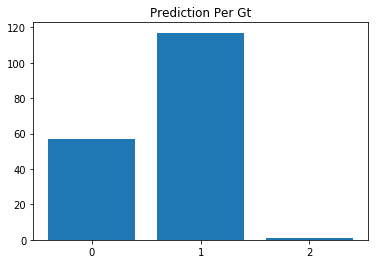

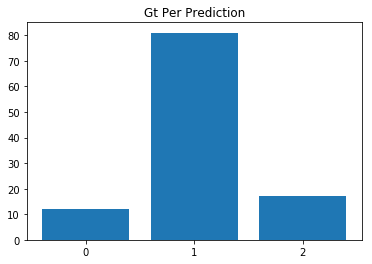

In [26]:
prec, rec = summarize(results, annotations)

In [27]:
print('Precision: ', prec)
print('Recall: ', rec)

Precision:  0.890909090909
Recall:  0.674285714286
